In [1]:
#### Problem Statement
###### How good is player X against CSK in Chepauk when they're playing three spinners

In [2]:
## Topics which are gonna be covered
### Importing libraries
### read csv
#### Terminology
### like RPI, BPB, BPD, RPW and so on with phases

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
deliveries2 = pd.read_csv('deliveries2.csv')
matches2 = pd.read_csv('matches2.csv')

In [5]:
matches2.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [6]:
deliveries2.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


In [7]:
# Matches & Innings
# Matches: Included in playing 11
# Innings: when he gets the chance to bat

# Batting Average : Runs/dismissals
# Batting SR: Runs/balls*100
# Runs Per Innings: Runs/Innings


## Balls per boundary: balls/(fours + sixes)
## Dot% : total_dots/balls
## Boundary% : Total_boundaries/balls
### Non-boundary% : (0 + 1 + 2 + 3)/balls


In [8]:
## topics to be covered
## Adding features
## extract player level information groupby and aggregate
## different scenarios filtering and sorting

In [9]:
df = deliveries2.copy()

In [10]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [11]:
df['isDot'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0)
df['isOne'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0)
df['isTwo'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0)
df['isThree'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0)
df['isFour'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0)
df['isSix'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0)

In [12]:
df.head(50)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1,0,0,0,0,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,1,0,0,0,0,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN,1,0,0,0,0,0
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN,0,0,0,0,1,0
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN,0,0,0,0,1,0


In [13]:
len(df['batter'].unique())

673

In [14]:
df.groupby(['batter'])['batsman_runs'].mean()

batter
A Ashish Reddy    1.428571
A Badoni          1.255446
A Chandila        0.571429
A Chopra          0.706667
A Choudhary       1.250000
                    ...   
Yashpal Singh     0.701493
Younis Khan       0.428571
Yudhvir Singh     1.375000
Yuvraj Singh      1.247848
Z Khan            0.829787
Name: batsman_runs, Length: 673, dtype: float64

In [15]:
df.groupby(['batter', 'match_id'])['batsman_runs'].sum().head(10)

batter          match_id
A Ashish Reddy  548346      10
                548352      3 
                548359      8 
                548373      10
                548376      4 
                598000      7 
                598004      14
                598010      16
                598013      4 
                598018      19
Name: batsman_runs, dtype: int64

In [16]:
df[df.batter == 'DA Warner'].groupby(['batter', 'match_id'])['batsman_runs'].sum()

batter     match_id
DA Warner  392206      51
           392211      36
           392215      21
           392219      36
           392223      4 
                      .. 
           1422134     18
           1422138     10
           1426264     8 
           1426273     1 
           1426300     1 
Name: batsman_runs, Length: 184, dtype: int64

In [17]:
df[df.batter == 'BB McCullum'].groupby(['batter', 'match_id'])['batsman_runs'].sum()

batter       match_id
BB McCullum  335982      158
             335986      5  
             335993      24 
             335997      1  
             392184      1  
                        ..  
             1136568     0  
             1136571     4  
             1136589     38 
             1136591     37 
             1136595     5  
Name: batsman_runs, Length: 109, dtype: int64

In [18]:
df.groupby(['match_id', 'batter'])['batsman_runs'].sum()

match_id  batter       
335982    AA Noffke        9  
          B Akhil          0  
          BB McCullum      158
          CL White         6  
          DJ Hussey        12 
                           .. 
1426312   SP Narine        6  
          SS Iyer          6  
          Shahbaz Ahmed    8  
          TM Head          0  
          VR Iyer          52 
Name: batsman_runs, Length: 16515, dtype: int64

In [19]:
##### top batsman till date acc to new data
pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).sort_values(by = 'batsman_runs', ascending = False).head(10).reset_index()

,batter,batsman_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


In [20]:
df[df['batting_team'] == 'Sunrisers Hyderabad'].tail(100)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
260753,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,2,6,AK Markram,MA Starc,RA Tripathi,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
260754,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,3,1,RA Tripathi,VG Arora,AK Markram,0,1,1,wides,0,NaN,NaN,NaN,1,0,0,0,0,0
260755,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,3,2,RA Tripathi,VG Arora,AK Markram,0,1,1,wides,0,NaN,NaN,NaN,1,0,0,0,0,0
260756,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,3,3,RA Tripathi,VG Arora,AK Markram,1,0,1,NaN,0,NaN,NaN,NaN,0,1,0,0,0,0
260757,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,3,4,AK Markram,VG Arora,RA Tripathi,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260848,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,5,JD Unadkat,SP Narine,PJ Cummins,0,0,0,NaN,1,JD Unadkat,lbw,NaN,1,0,0,0,0,0
260849,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,17,6,B Kumar,SP Narine,PJ Cummins,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
260850,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,1,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
260851,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,2,PJ Cummins,AD Russell,B Kumar,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0


In [21]:
df[df['bowling_team'] == 'Chennai Super Kings'].head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
349,335983,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN,0,0,0,0,1,0
350,335983,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
351,335983,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
352,335983,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN,0,1,0,0,0,0
353,335983,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,335983,2,Kings XI Punjab,Chennai Super Kings,15,2,SM Katich,P Amarnath,KC Sangakkara,0,1,1,byes,0,NaN,NaN,NaN,1,0,0,0,0,0
445,335983,2,Kings XI Punjab,Chennai Super Kings,15,3,KC Sangakkara,P Amarnath,SM Katich,4,0,4,NaN,0,NaN,NaN,NaN,0,0,0,0,1,0
446,335983,2,Kings XI Punjab,Chennai Super Kings,15,4,KC Sangakkara,P Amarnath,SM Katich,1,0,1,NaN,0,NaN,NaN,NaN,0,1,0,0,0,0
447,335983,2,Kings XI Punjab,Chennai Super Kings,15,5,SM Katich,P Amarnath,KC Sangakkara,1,0,1,NaN,0,NaN,NaN,NaN,0,1,0,0,0,0


In [22]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [23]:
df[df['ball'] == 6].head(100)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
12,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,6,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
18,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,6,SC Ganguly,P Kumar,BB McCullum,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
24,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,3,6,SC Ganguly,AA Noffke,BB McCullum,1,0,1,NaN,0,NaN,NaN,NaN,0,1,0,0,0,0
31,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,4,6,SC Ganguly,P Kumar,BB McCullum,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,335984,2,Delhi Daredevils,Rajasthan Royals,0,6,G Gambhir,MM Patel,V Sehwag,4,0,4,NaN,0,NaN,NaN,NaN,0,0,0,0,1,0
606,335984,2,Delhi Daredevils,Rajasthan Royals,1,6,S Dhawan,SR Watson,G Gambhir,0,1,1,wides,0,NaN,NaN,NaN,1,0,0,0,0,0
613,335984,2,Delhi Daredevils,Rajasthan Royals,2,6,S Dhawan,MM Patel,G Gambhir,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
619,335984,2,Delhi Daredevils,Rajasthan Royals,3,6,G Gambhir,SR Watson,S Dhawan,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0


In [24]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1,0,0,0,0,0


In [25]:
runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'}).rename(columns = {'batter': 'batsman'})

In [26]:
runs

,batsman,runs
0,A Ashish Reddy,280
1,A Badoni,634
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
668,Yashpal Singh,47
669,Younis Khan,3
670,Yudhvir Singh,22
671,Yuvraj Singh,2754


In [27]:
balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).head(5).reset_index().rename(columns = {'match_id': 'balls'}).rename(columns = {'batter': 'batsman'})

In [28]:
df.groupby(['batter'])['inning'].count().head(5)

batter
A Ashish Reddy    196
A Badoni          505
A Chandila        7  
A Chopra          75 
A Choudhary       20 
Name: inning, dtype: int64

In [29]:
balls

,batsman,balls
0,A Ashish Reddy,196
1,A Badoni,505
2,A Chandila,7
3,A Chopra,75
4,A Choudhary,20


In [30]:
runs

,batsman,runs
0,A Ashish Reddy,280
1,A Badoni,634
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
668,Yashpal Singh,47
669,Younis Khan,3
670,Yudhvir Singh,22
671,Yuvraj Singh,2754


In [31]:
dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed': 'dismissals'}).rename(columns = {'batter': 'batsman'})

In [32]:
dismissals

,batsman,dismissals
0,A Ashish Reddy,15
1,A Badoni,26
2,A Chandila,1
3,A Chopra,5
4,A Choudhary,2
...,...,...
668,Yashpal Singh,4
669,Younis Khan,1
670,Yudhvir Singh,4
671,Yuvraj Singh,109


In [33]:
sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns ={'isSix': 'sixes'}).rename(columns ={'batter': 'batsman'})
fours = df.groupby(['batter'])['isFour'].sum().reset_index().rename(columns ={'isFour': 'fours'}).rename(columns ={'batter': 'batsman'})

In [34]:
sixes

,batsman,sixes
0,A Ashish Reddy,15
1,A Badoni,24
2,A Chandila,0
3,A Chopra,0
4,A Choudhary,1
...,...,...
668,Yashpal Singh,0
669,Younis Khan,0
670,Yudhvir Singh,2
671,Yuvraj Singh,149


In [35]:
df.groupby(['batsman_runs'])['match_id']

In [36]:
innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id': 'innings'}).rename(columns = {'batter': 'batsman'})

In [37]:
innings

,batsman,innings
0,A Ashish Reddy,23
1,A Badoni,35
2,A Chandila,2
3,A Chopra,6
4,A Choudhary,3
...,...,...
668,Yashpal Singh,4
669,Younis Khan,1
670,Yudhvir Singh,4
671,Yuvraj Singh,126


In [38]:
runs.head(1)

,batsman,runs
0,A Ashish Reddy,280


In [39]:
balls.head(1)

,batsman,balls
0,A Ashish Reddy,196


In [40]:
mega = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')

In [41]:
mega = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')

In [42]:
mega.head(100)

,batsman,innings,runs,balls,dismissals,fours,sixes
0,A Ashish Reddy,23,280,196,15,16,15
1,A Badoni,35,634,505,26,46,24
2,A Chandila,2,4,7,1,0,0
3,A Chopra,6,53,75,5,7,0
4,A Choudhary,3,25,20,2,1,1


In [43]:


runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'}).rename(columns = {'batter': 'batsman'})
balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).head(5).reset_index().rename(columns = {'match_id': 'balls'}).rename(columns = {'batter': 'batsman'})
innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id': 'innings'}).rename(columns = {'batter': 'batsman'})
dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed': 'dismissals'}).rename(columns = {'batter': 'batsman'})
sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns ={'isSix': 'sixes'}).rename(columns ={'batter': 'batsman'})
fours = df.groupby(['batter'])['isFour'].sum().reset_index().rename(columns ={'isFour': 'fours'}).rename(columns ={'batter': 'batsman'})



In [44]:
# player runs in 1st and 2nd innings

In [45]:
mega['RPI'] = mega.apply(lambda x: (x['runs']/x['innings']), axis = 1)

In [46]:
mega.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,23,280,196,15,16,15,12.173913
1,A Badoni,35,634,505,26,46,24,18.114286
2,A Chandila,2,4,7,1,0,0,2.000000
3,A Chopra,6,53,75,5,7,0,8.833333
4,A Choudhary,3,25,20,2,1,1,8.333333


In [47]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1,0,0,0,0,0


In [48]:
df[df.inning == 1].reset_index(drop = True).head(200)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,isDot,isOne,isTwo,isThree,isFour,isSix
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,1,0,0,0,0,0
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,1,0,0,0,0,0
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,335983,1,Chennai Super Kings,Kings XI Punjab,11,4,SK Raina,K Goel,MEK Hussey,6,0,6,NaN,0,NaN,NaN,NaN,0,0,0,0,0,1
196,335983,1,Chennai Super Kings,Kings XI Punjab,11,5,SK Raina,K Goel,MEK Hussey,1,0,1,NaN,0,NaN,NaN,NaN,0,1,0,0,0,0
197,335983,1,Chennai Super Kings,Kings XI Punjab,11,6,MEK Hussey,K Goel,SK Raina,2,0,2,NaN,0,NaN,NaN,NaN,0,0,1,0,0,0
198,335983,1,Chennai Super Kings,Kings XI Punjab,12,1,SK Raina,WA Mota,MEK Hussey,0,1,1,wides,0,NaN,NaN,NaN,1,0,0,0,0,0


In [49]:
def ByInnings(df, current_innings):
    
    df = df[df.inning == current_innings]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0)
    
    
    runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'}).rename(columns = {'batter': 'batsman'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).head(5).reset_index().rename(columns = {'match_id': 'balls'}).rename(columns = {'batter': 'batsman'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id': 'innings'}).rename(columns = {'batter': 'batsman'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed': 'dismissals'}).rename(columns = {'batter': 'batsman'})
    sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns ={'isSix': 'sixes'}).rename(columns ={'batter': 'batsman'})
    fours = df.groupby(['batter'])['isFour'].sum().reset_index().rename(columns ={'isFour': 'fours'}).rename(columns ={'batter': 'batsman'})

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']), axis = 1)
    
    return df

In [50]:
ing1_df = ByInnings(df, 1)

In [51]:
ing2_df = ByInnings(df, 2)

In [52]:
ing1_df.head(2)

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
0,A Ashish Reddy,13,166,115,7,6,10,12.769231
1,A Badoni,19,464,338,13,36,18,24.421053


In [53]:
ing2_df.tail(2)

,batsman,innings,runs,balls,dismissals,fours,sixes,RPI
3,A Choudhary,2,10,8,2,0,1,5.0
4,A Flintoff,2,40,43,2,3,1,20.0


In [54]:
ing1_df = ing1_df[['batsman', 'RPI']].rename(columns = {'RPI': 'ing1_rpi'})

In [55]:
ing2_df = ing2_df[['batsman', 'RPI']].rename(columns = {'RPI': 'ing2_rpi'})

In [56]:
ing1_df.head(15)

,batsman,ing1_rpi
0,A Ashish Reddy,12.769231
1,A Badoni,24.421053
2,A Chandila,2.000000
3,A Chopra,10.200000
4,A Choudhary,15.000000


In [57]:
ing2_df.head(15)

,batsman,ing2_rpi
0,A Ashish Reddy,11.400
1,A Badoni,10.625
2,A Chopra,2.000
3,A Choudhary,5.000
4,A Flintoff,20.000


In [58]:
comb = pd.merge(ing1_df, ing2_df, on = 'batsman')

In [59]:
comb.head(2)

,batsman,ing1_rpi,ing2_rpi
0,A Ashish Reddy,12.769231,11.400
1,A Badoni,24.421053,10.625


In [60]:
### Need to plot ahead

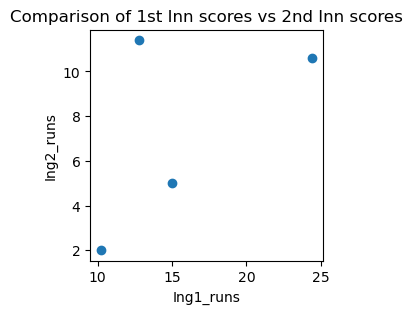

In [61]:
plt.figure(figsize = (3,3))

selected_players = ['V Kohli', 'MS Dhoni']
annotations = list(comb['batsman'])

plt.scatter(comb['ing1_rpi'], comb['ing2_rpi'])
plt.xlabel('Ing1_runs')
plt.ylabel('Ing2_runs')
plt.title('Comparison of 1st Inn scores vs 2nd Inn scores')

for i, j in enumerate(annotations):
    if j in selected_players:
        plt.annotate(j, (comb['ing1_rpi'][i], comb['ing2_rpi'][i]))


plt.show()

In [62]:
### Stadium: Chepauk
#### Phase: Middle Overs
### Opposition team: Chennai SuperKings

In [63]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

In [64]:
def ByCustom(df, current_venue, current_phase, current_opposition):
    
    df = df[df.venue == current_venue]
    df = df[df.phase == current_phase]
    df = df[df.bowling_team == current_opposition]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0)
    
    
    runs = pd.DataFrame(df.groupby(['batter'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'}).rename(columns = {'batter': 'batsman'})
    balls = pd.DataFrame(df.groupby(['batter'])['match_id'].count()).head(5).reset_index().rename(columns = {'match_id': 'balls'}).rename(columns = {'batter': 'batsman'})
    innings = pd.DataFrame(df.groupby(['batter'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'match_id': 'innings'}).rename(columns = {'batter': 'batsman'})
    dismissals = pd.DataFrame(df.groupby(['batter'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed': 'dismissals'}).rename(columns = {'batter': 'batsman'})
    sixes = pd.DataFrame(df.groupby(['batter'])['isSix'].sum()).reset_index().rename(columns ={'isSix': 'sixes'}).rename(columns ={'batter': 'batsman'})
    fours = df.groupby(['batter'])['isFour'].sum().reset_index().rename(columns ={'isFour': 'fours'}).rename(columns ={'batter': 'batsman'})

    dots = df.groupby(['batter'])['isDot'].sum().reset_index().rename(columns ={'isDot': 'dots'}).rename(columns ={'batter': 'batsman'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman').merge(dots, on = 'batsman')
    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']), axis = 1)
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    df['dot_percentage'] = df.apply(lambda x: (x['dots']/x['balls']), axis = 1)
    
    
    return df

In [65]:
df = deliveries2.copy()

In [66]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


In [67]:
mdf = matches2.copy()

In [68]:
mdf.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [69]:
mdf = mdf.rename(columns = {'id' : 'match_id'})

In [70]:
comb = pd.merge(df, mdf, on = 'match_id', how = 'left')

In [84]:
comb.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [72]:
comb['over_no'] = comb['over'].apply(lambda x: x - 1)

In [73]:
def get_phase(over_no):
    # powerplay 0.1 - 5.6
    if over_no < 6:
        return 'Powerplay'
     # middle 6.1 - 14.6
    elif over_no < 15:
        return 'Middle'
    else:
        return 'Death'

In [74]:
comb['phase'] = comb['over_no'].apply(lambda x: get_phase(x))

In [101]:
df1 = ByCustom(comb, 'M Chinnaswamy Stadium', 'Death', 'Royal Challengers Bangalore')

In [102]:
df1.head()

,batsman,innings,runs,balls,dismissals,fours,sixes,dots,RPI,SR,BPD,BPB,dot_percentage
0,A Ashish Reddy,1,3,4,1,0,0,1,3.0,75.000000,4.0,4.0,0.250000
1,A Chandila,1,4,6,0,0,0,2,4.0,66.666667,6.0,6.0,0.333333
2,A Nehra,1,0,1,0,0,0,1,0.0,0.000000,1.0,1.0,1.000000
3,A Symonds,1,33,12,0,2,3,1,33.0,275.000000,12.0,2.4,0.083333
4,AB Agarkar,1,6,7,0,0,0,2,6.0,85.714286,7.0,7.0,0.285714
